# All Students in CIP

In [18]:

warnings=F
library(IRdisplay)
library(tidyverse)
library(data.table)
library(ggpubr)
library(kableExtra)
data <- read_csv("All Student in CIP.csv")
glimpse(data)
data$College <- as.factor(data$College)
data$Major <- as.factor(data$Major)
data$City <- as.factor(data$City)
data$Ethnicity <- as.factor(data$Ethnicity)

Parsed with column specification:
cols(
  Name = col_character(),
  College = col_character(),
  Ethnicity = col_character(),
  City = col_character(),
  Major = col_character(),
  `Graduation Date` = col_character(),
  `Birth Date` = col_character()
)


Observations: 4,450
Variables: 7
$ Name              <chr> "Ansumana jaiteh", "Eric Coyotecatl", "Aimee Vero...
$ College           <chr> "Hostos Community College", "City College", "Bron...
$ Ethnicity         <chr> "Non-Hispanic or Latino", "Hispanic or Latino", N...
$ City              <chr> "Bronx", "Manhattan", NA, NA, "Brooklyn", "Brookl...
$ Major             <chr> "Accounting", "Liberal Studies", "Political Scien...
$ `Graduation Date` <chr> "1-Dec-20", "1-Dec-20", "1-Dec-20", "1-Dec-20", "...
$ `Birth Date`      <chr> "30-Dec-91", "12-Jul-98", "10-Oct-90", "-", "28-A...


In [19]:
data2<- data %>%
          mutate(college_category = ifelse(College == "York College","4 Year Schools",                              
        ifelse(College == "Macaulay Honors College","4 Year Schools",ifelse(College =="John Jay College of Criminal Justice","4 Year Schools",ifelse(College =="College of Staten Island","4 Year Schools",
        ifelse(College == "LaGuardia Community College", "Community Colleges",ifelse(College =="Bronx Community College", "Community Colleges",ifelse(College=="Hostos Community College","Community College", ifelse( "Kingsborough Community College","Community Colleges",
          ifelse(College=="Borough of Manhattan Community College", "Community Colleges",ifelse(College=="Guttman Community College", "Community Colleges",ifelse(College== "CUNY Graduate Center","CUNY Graduate School",ifelse(College == "Baruch College","4 Year Schools",
        ifelse(College == "City College","4 Year Schools",ifelse(College =="Hunter College","4 Year Schools",ifelse(College == "Queens College","4 Year Schools",ifelse(College=="New York City College of Technology","New York City College of Technology",
        ifelse(College == "Lehman College","4 Year Schools",ifelse(College =="Brooklyn College","4 Year Schools","NA")))))))))))))))))),
                           
         major_category = ifelse( Major %like% "^Accounting" | Major %like% "^Finance" |Major %like% "^Management"|Major %like% "^Economics"|Major %like% "^Advertising"|Major %like% "^Marketing" |Major %like% "^Communications" |Major %like% "^Hotel", "Business", 
         ifelse(Major %like% "^Ar" |Major %like% "^Criminal" |Major %like% "^Edu" |Major %like% "^Film" |Major %like% "^English" |Major %like% "^Lib" |Major %like% "^N" |Major %like% "^Psy" |Major %like% "^S" |Major %like% "Ethnic"| Major %like% "^Poli"| Major %like% "^Paralegal", "Other Majors",            
            ifelse(Major %like% "^Mathematics" |Major %like% "^Bio" |Major %like% "^Chemi" |Major %like% "^Civil" |Major %like% "^Ele" |Major %like% "^Geo" |Major %like% "^Mec"|Major %like% "^Physician Assistant"| Major %like% "^Medical Assistant"|Major %like% "^Public Health", "Other STEM",
             ifelse(Major %like% "^Computer Engineering", "Computer Engineering/Technology", ifelse(Major %like% "^Computer Science", "Computer Science",
                 ifelse(Major %like%"^Computer Information Systems/Science","Computer Information Systems/Science",ifelse(Major %like%"^Computer Systems", "Computer Systems Technology", "Other Majors" ))))))))

This report contains information on students who have their graduation date set for December 2020 and beyond. The two tables below show the distribution of majors among the students. The first table focuses on STEM and Business related majors. Any major that is not Business related or STEM-related is categorized as "Other Majors," which is expanded upon in the second table. It's important to note that Computer Engineering/Technology category includes both Computer Engineering majors (52 students) and Computer Engineering Technology majors (67 students). The most frequent majors within the "Other STEM" category are Biological Science, Electrical and Mechanical Engineering, and Public Health. Within the "Business" category, the most common majors are Accounting, Finance, and Management. 

In [12]:

a <- plyr::count(data2$major_category)
a <- a %>%
      mutate(P = paste(round(freq*100/sum(freq), digits = 1), "%", sep = " "))%>%
  arrange(desc(freq))

kable(a, col.names = c("Major Categories", "Frequency", "Percentage"), align=  "lcr")%>%
  kable_styling(bootstrap_options = "condense","striped")%>%
as.character()%>%
display_html()

Major Categories,Frequency,Percentage
Other Majors,1708,38.4 %
Business,847,19 %
Other STEM,738,16.6 %
Computer Science,507,11.4 %
Computer Information Systems/Science,373,8.4 %
Computer Systems Technology,158,3.6 %
Computer Engineering/Technology,119,2.7 %


In [13]:
e <- data2 %>%
  filter(major_category == "Other Majors")%>%
  mutate(major_category
         =ifelse( Major %like% "^Accounting" , "Accounting",ifelse(Major %like% "^Finance", "Finance",ifelse(Major %like% "^Management", "Management", ifelse(Major %like% "^Economics", "Economics",ifelse(Major %like% "^Marketing","Marketing", ifelse(Major %like% "^Communications", "Communications",ifelse(Major %like% "^Art", "Art" , ifelse(Major %like% "^Criminal","Criminal Justice", ifelse(Major %like% "^Edu", "Education", ifelse(Major %like% "^Film"|Major %like% "^Theater", "Film/Theater", ifelse(Major %like% "^English", "English",ifelse(Major %like% "^Lib", "Liberal Studies", ifelse(Major %like% "^Nu", "Nursing", ifelse(Major %like% "^Psy", "Psychology",ifelse(Major %like% "^Soc", "Sociology", ifelse(Major %like% "^Archi","Architecture", ifelse(Major %like% "^Political Science","Political Science", ifelse(Major %like% "^Paralegal Studies","Paralegal Studies","Other Majors" )))))))))))))))))))

a <- plyr::count(e$major_category)
a <- a %>%
      mutate(P = paste(round(freq*100/sum(freq), digits = 1), "%", sep = " "))%>%
  arrange(desc(freq))

kable(a, col.names = c("Majors", "Frequency", "Percentage"),caption = "These are most of the common majors in the \"Other Majors\" category", align=  "lcr")%>%
  kable_styling(bootstrap_options = "condense","striped")%>%
as.character()%>%
display_html()


Majors,Frequency,Percentage
Other Majors,332,19.4 %
Psychology,310,18.1 %
Nursing,230,13.5 %
Liberal Studies,216,12.6 %
Criminal Justice,123,7.2 %
Education,95,5.6 %
Political Science,87,5.1 %
Sociology,82,4.8 %
Paralegal Studies,57,3.3 %
Art,48,2.8 %


The following table below shows the distribution of students among the CUNY colleges. 

In [15]:

b <- plyr::count(data$College)
b <- b %>%
  mutate(Percentage = paste(round(freq*100/sum(freq), digits = 2), "%", sep = " "))%>%
  arrange(desc(freq))

        
 kableExtra::kable( b, col.names = c("College Name", "Frequency", "Percentage"), align = "lcr")%>%
           kableExtra::kable_styling(bootstrap_options = c("condense", "striped"), full_width = F, position = "left")%>%
as.character()%>%
display_html()

College Name,Frequency,Percentage
New York City College of Technology,615,13.82 %
City College,453,10.18 %
Baruch College,446,10.02 %
Brooklyn College,418,9.39 %
Hunter College,374,8.4 %
John Jay College of Criminal Justice,320,7.19 %
Queens College,282,6.34 %
York College,276,6.2 %
Lehman College,237,5.33 %
College of Staten Island,187,4.2 %


The graph below shows where students are coming from. However, this graph does not give an accurate representation given that many students did not fill in what city they are from. 

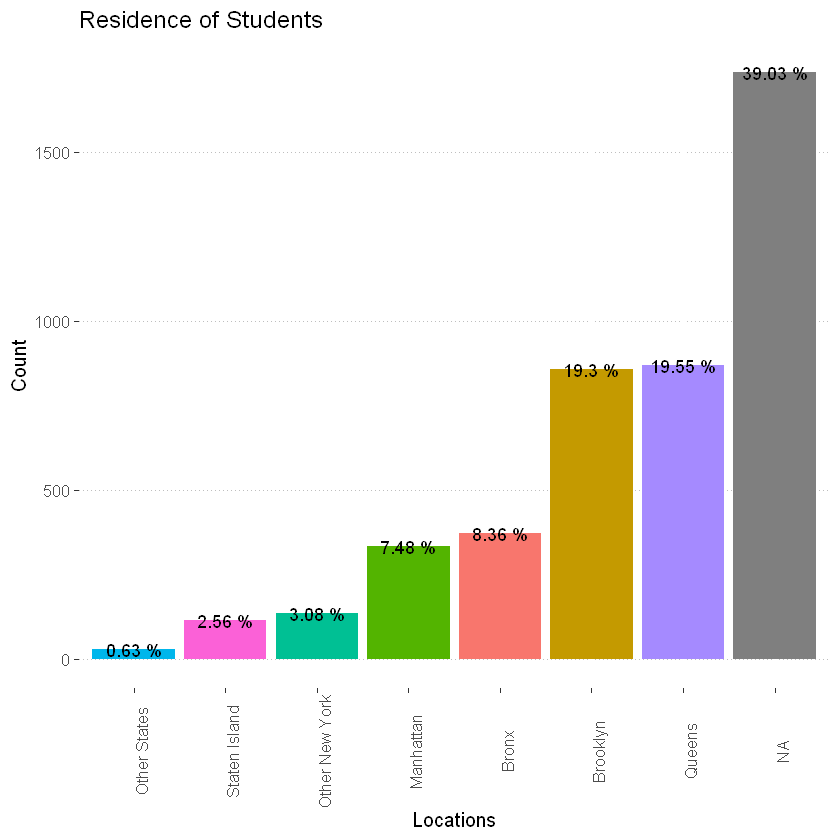

In [16]:
c <- plyr::count(data$City)

c <- c %>%
  mutate(percent = round(freq*100/sum(freq), digits = 2),
         percent2 = paste(round(freq*100/sum(freq), digits = 2),"%" ,sep = " "))

z <- ggplot(c, aes(x =fct_reorder(x, freq), y= freq, fill= x ))+ geom_bar(stat = "identity")+ theme_pubclean()+geom_text(aes(label = percent2))

z <- z+ theme(axis.text.x = element_text(angle = 90), legend.position = "NONE")+ labs(title = "Residence of Students", x= "Locations", y= "Count")
z

